## Assignment-2 (CE-524 : Hydroclimatology)

<div>
    <span>Name: Anand Prabhakar</span><br>
    <span>Roll no.: DD23017</span><br>
    <span>Submitted to: Dr. Vivek Gupta</span><br>
    <span>Submitted on: 15/09/2024</span><br>
</div>

## Water budget for the Nalanda District of Bihar
<div align="center"><img src="Nalanda.png" width="50%"></div>
<span style="float: right">Image (above) Source: <b>Wikipedia</b> </span>
<br>
<span style="float: right">Data Source : 
<b>India Water Resources Information System</b> </span>


In [124]:
import netCDF4 as nc  
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [125]:
prec = pd.read_csv('Precipitation/yearly/csvFile275.csv')
#prec.count()
prec.set_index("Year", inplace = True)
prec

,NORMAL (mm),ACTUAL (mm)
Year,,
2018,1036.4,761.41
2019,1036.4,918.46
2020,1036.4,1057.34
2021,1036.4,1328.56
2022,1036.4,676.05
2023,1036.4,773.87
2024,971.5,596.52


In [126]:
et = pd.read_csv('ET/yearly/et.csv')
et.set_index("Year", inplace = True)
#prec.count()
et

,Evapo-transpiration (in mm)
Year,
2018,2.18
2019,1.89
2020,2.00
2021,2.02
2022,1.81
2023,1.62
2024,1.59


#### water storage $$ \frac{dS}{dt} = P - ET - Q = 0 (say)$$ 
In our case, discharge data is classified (not available due to certain restrictions).
So, in this condition we can estimate the discharge as:
#### $$ Q = P - ET $$
we have precipitation and ET data, both available from 2018 to 2024

In [127]:
Q = prec['ACTUAL (mm) '].sub(et['Evapo-transpiration (in mm)'])

In [128]:
Q

Year
2018     759.23
2019     916.57
2020    1055.34
2021    1326.54
2022     674.24
2023     772.25
2024     594.93
dtype: float64

In [129]:
Q = pd.DataFrame({'Discharge': Q})

In [130]:
Q

,Discharge
Year,
2018,759.23
2019,916.57
2020,1055.34
2021,1326.54
2022,674.24
2023,772.25
2024,594.93


In [131]:
Q.columns

Index(['Discharge'], dtype='object')

In [189]:
Qmax = Q.max()
Qmin = Q.min()
print("Minimum",Qmin)
print("Maximum",Qmax)

Minimum Discharge    594.93
dtype: float64
Maximum Discharge    1326.54
dtype: float64


In [147]:
Q.to_csv('Discharge/nalanda_calculated_discharge.csv')

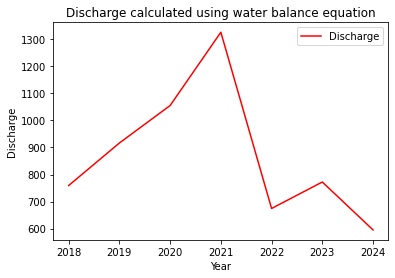

In [181]:
plt.plot(Q, color='r', label='Discharge')
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Year")
plt.ylabel("Discharge")
plt.title("Discharge calculated using water balance equation")

#plt.errorbar(Q)
plt.legend(prop={'size': 10})

# To load the display window
plt.show()

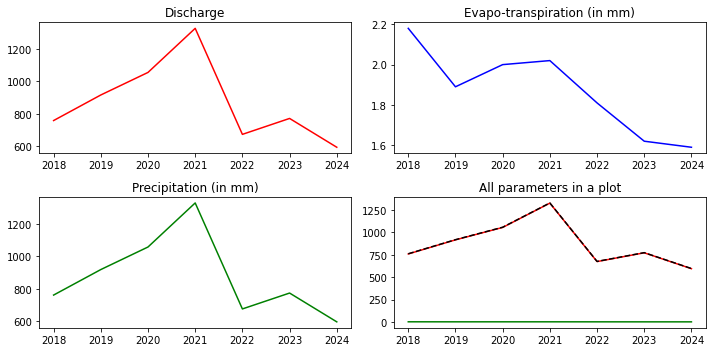

In [168]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2,2, figsize=(10,5))

# Discharge
axis[0,0].plot(Q, 'r')
axis[0,0].set_title("Discharge")

# Evapotranspiration
axis[0,1].plot(et['Evapo-transpiration (in mm)'],'b')
axis[0,1].set_title("Evapo-transpiration (in mm)")

# Total Precipitation
axis[1,0].plot(prec['ACTUAL (mm) '],'g')
axis[1,0].set_title("Precipitation (in mm)")
plt.tight_layout()

#all in one
axis[1,1].plot(Q, color='r', label='Discharge')
axis[1,1].plot(et['Evapo-transpiration (in mm)'],color='g', label='Evapo-transpiration')
axis[1,1].plot(prec['ACTUAL (mm) '], color='black',linestyle='dashed', label='Precipitation')
axis[1,1].set_title("All parameters in a plot")


plt.tight_layout()
plt.show()